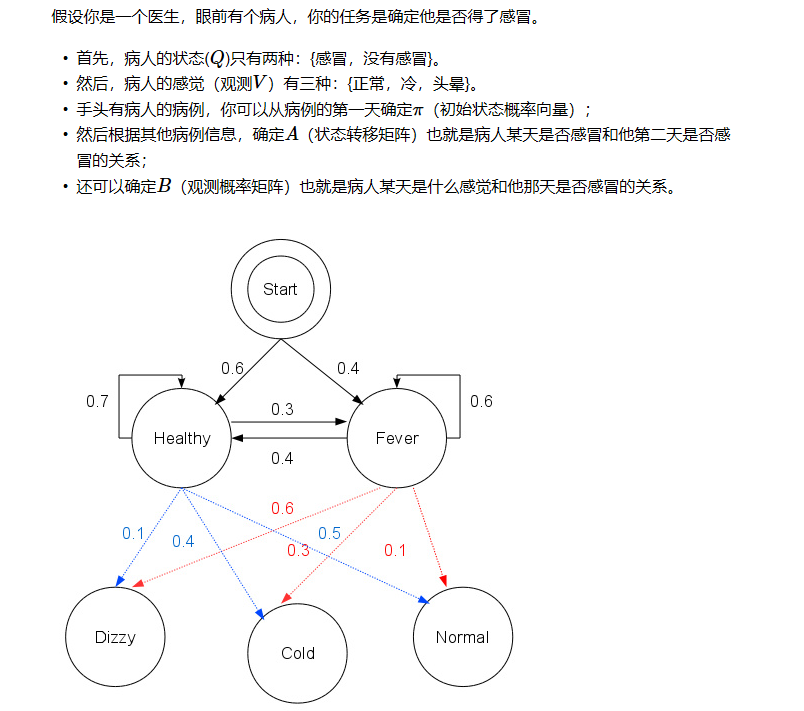

In [1]:
import numpy as np

In [2]:

# 随机生成观测序列和状态序列    
def simulate(T):

    def draw_from(probs):
        """
        1.np.random.multinomial:
        按照多项式分布，生成数据
        >>> np.random.multinomial(20, [1/6.]*6, size=2)
                array([[3, 4, 3, 3, 4, 3],
                       [2, 4, 3, 4, 0, 7]])
         For the first run, we threw 3 times 1, 4 times 2, etc.  
         For the second, we threw 2 times 1, 4 times 2, etc.
        2.np.where:
        >>> x = np.arange(9.).reshape(3, 3)
        >>> np.where( x > 5 )
        (array([2, 2, 2]), array([0, 1, 2]))
        """
        return np.where(np.random.multinomial(1,probs) == 1)[0][0]

    observations = np.zeros(T, dtype=int)
    states = np.zeros(T, dtype=int)
    states[0] = draw_from(pi)
    observations[0] = draw_from(B[states[0],:])
    for t in range(1, T):
        states[t] = draw_from(A[states[t-1],:])
        observations[t] = draw_from(B[states[t],:])
    return observations, states

In [3]:
def generate_index_map(lables):
    id2label = {}
    label2id = {}
    i = 0
    for l in lables:
        id2label[i] = l
        label2id[l] = i
        i += 1
    return id2label, label2id

In [4]:

def convert_map_to_vector(map_, label2id):
    """将概率向量从dict转换成一维array"""
    v = np.zeros(len(map_), dtype=float)
    for e in map_:
        v[label2id[e]] = map_[e]
    return v


In [5]:
def convert_map_to_matrix(map_, label2id1, label2id2):
    """将概率转移矩阵从dict转换成矩阵"""
    m = np.zeros((len(label2id1), len(label2id2)), dtype=float)
    for line in map_:
        for col in map_[line]:
            m[label2id1[line]][label2id2[col]] = map_[line][col]
    return m


In [6]:

# 对应状态集合Q
states = ('Healthy', 'Fever')
# 对应观测集合V
observations = ('normal', 'cold', 'dizzy')
# 初始状态概率向量π
start_probability = {'Healthy': 0.6, 'Fever': 0.4}
# 状态转移矩阵A
transition_probability = {
    'Healthy': {'Healthy': 0.7, 'Fever': 0.3},
    'Fever': {'Healthy': 0.4, 'Fever': 0.6},
}
# 观测概率矩阵B
emission_probability = {
    'Healthy': {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever': {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
}

In [7]:
states_id2label, states_label2id = generate_index_map(states)
observations_id2label, observations_label2id = generate_index_map(observations)
print(states_id2label, states_label2id)
print(observations_id2label, observations_label2id)

{0: 'Healthy', 1: 'Fever'} {'Healthy': 0, 'Fever': 1}
{0: 'normal', 1: 'cold', 2: 'dizzy'} {'normal': 0, 'cold': 1, 'dizzy': 2}


In [8]:

A = convert_map_to_matrix(transition_probability, states_label2id, states_label2id)
print(A)
B = convert_map_to_matrix(emission_probability, states_label2id, observations_label2id)
print(B)
observations_index = [observations_label2id[o] for o in observations]
pi = convert_map_to_vector(start_probability, states_label2id)
print(pi)

[[0.7 0.3]
 [0.4 0.6]]
[[0.5 0.4 0.1]
 [0.1 0.3 0.6]]
[0.6 0.4]


In [9]:
# 生成模拟数据
observations_data, states_data = simulate(10)
print(observations_data)
print(states_data)
# 相应的label
print("病人的状态: ", [states_id2label[index] for index in states_data])
print("病人的观测: ", [observations_id2label[index] for index in observations_data])

[1 2 1 0 1 1 2 1 0 1]
[0 1 1 1 1 1 1 1 1 0]
病人的状态:  ['Healthy', 'Fever', 'Fever', 'Fever', 'Fever', 'Fever', 'Fever', 'Fever', 'Fever', 'Healthy']
病人的观测:  ['cold', 'dizzy', 'cold', 'normal', 'cold', 'cold', 'dizzy', 'cold', 'normal', 'cold']
